# Rubidium Fluorescence Rates Calculations

From Metcalf (eq. 2.26)
$$
\text{Scattering Rate} = \gamma_p = \frac{\Gamma}{2}\frac{I/I_{sat}}{1+I/I_{sat}+(2\delta/\Gamma)^2}
$$
Steck (e.q. 48) agrees exactly

In [43]:
import matplotlib.pyplot as plt
import matplotlib.style
import MarksConstants as mc
import numpy as np
import Miscellaneous as misc

In [59]:
matplotlib.style.use('seaborn')

In [118]:
def scatteringRate(Gamma, I, Isat, delta):
    s0 = I/Isat
    return (Gamma/2) * s0 / (1+s0 + (2*delta/Gamma)**2)

In [119]:
def scatteringRate_Rb87_D2(I, delta):
    Gamma = mc.Rb87_D2Gamma
    Isat = mc.Rb87_I_Sat_ResonantIsotropic_2_to_3
    return scatteringRate(Gamma, I, Isat, delta)

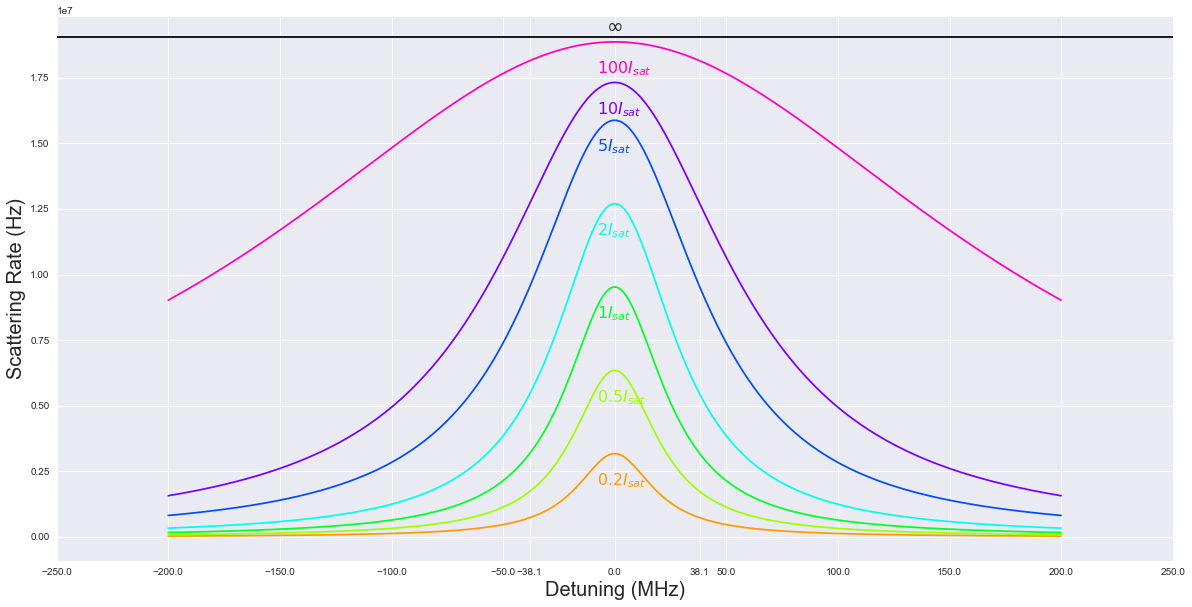

In [107]:
colors, anti = misc.getColors(7, cmStr='gist_rainbow')
detunings = np.linspace(-2e8, 2e8, 1000)
isat = mc.Rb87_I_Sat_ResonantIsotropic_2_to_3
fig, ax = plt.subplots(figsize=(20,10))
factors = [0.2, 0.5, 1, 2, 5, 10, 100]
for factor, color in zip(factors, colors):
    ax.plot(detunings/1e6, scatteringRate_Rb87_D2(isat*factor, detunings), color=color)
    ax.text(-8, scatteringRate_Rb87_D2(factor*isat, 0)-12e5, r'$' + misc.round_sig_str(factor, 1) + 'I_{sat}$', color=color, fontsize=16)
ax.axhline(mc.Rb87_D2Gamma/2, color='k')
ax.text(-4, mc.Rb87_D2Gamma/2+2e5, r'$\infty$', fontsize=20)
ax.set_xticks(list(ax.get_xticks()) + [mc.Rb87_D2Gamma*1e-6, -mc.Rb87_D2Gamma*1e-6 ])
plt.xlabel('Detuning (MHz)',fontsize=20)
plt.ylabel('Scattering Rate (Hz)', fontsize=20)
plt.grid(alpha=1)

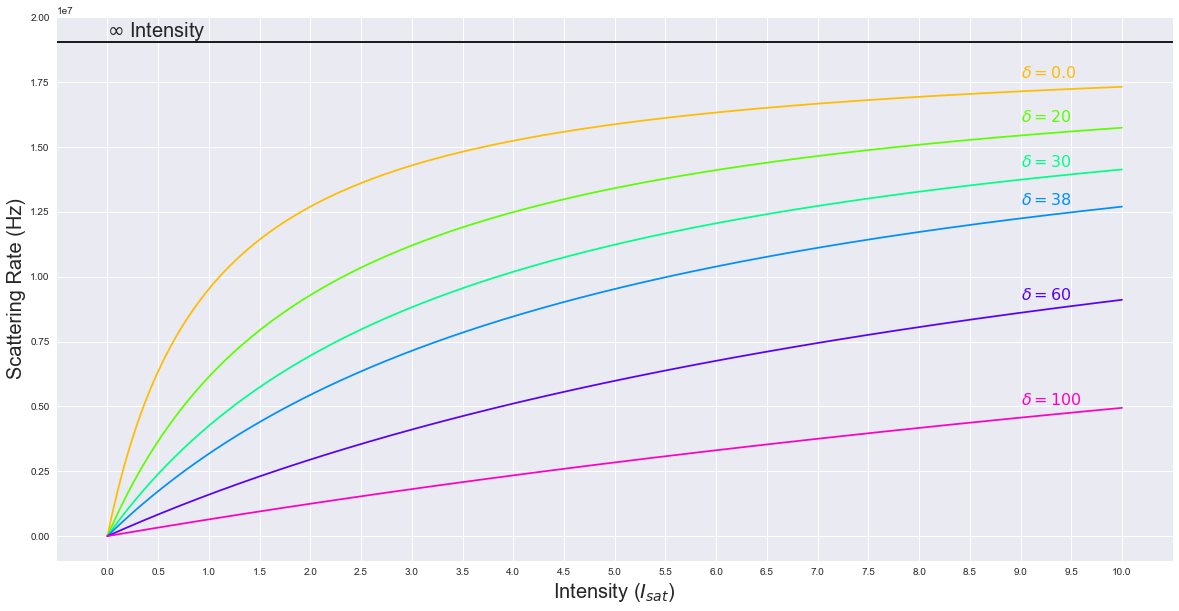

In [115]:
isat = mc.Rb87_I_Sat_ResonantIsotropic_2_to_3
intensities = np.linspace(0, 10*isat, 1000)
fig, ax = plt.subplots(figsize=(20,10))
detunings = np.array([0, 20, 30, mc.Rb87_D2Gamma*1e-6, 60, 100])*1e6
colors, anti = misc.getColors(len(detunings), cmStr='gist_rainbow')
for detuning, color in zip(detunings, colors):
    ax.plot(intensities/isat, scatteringRate_Rb87_D2(intensities, detuning), color=color)
    ax.text(9, scatteringRate_Rb87_D2(9*isat, detuning)+5e5, r'$\delta=' + misc.round_sig_str(detuning*1e-6, 2) + '$', color=color, fontsize=16)
ax.axhline(mc.Rb87_D2Gamma/2, color='k')
ax.text(0, mc.Rb87_D2Gamma/2+2e5, r'$\infty$ Intensity', fontsize=20)
ax.set_xticks(np.arange(0, 10.4, 0.5))
plt.xlabel(r'Intensity ($I_{sat}$)',fontsize=20)
plt.ylabel(r'Scattering Rate (Hz)', fontsize=20)
plt.grid(alpha=1)

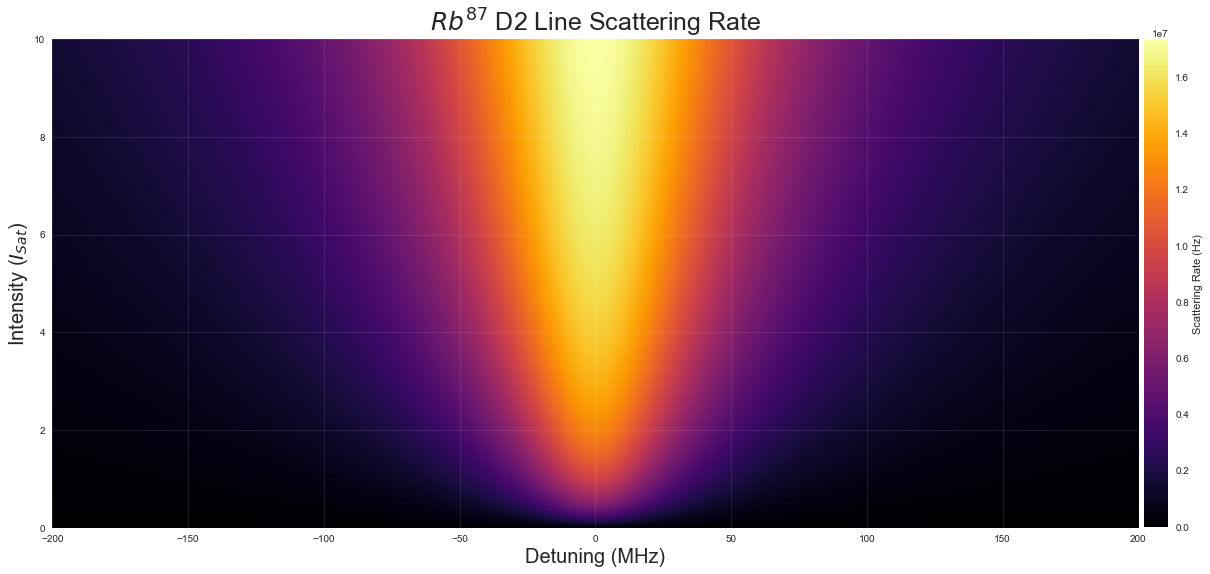

In [205]:
isat = mc.Rb87_I_Sat_ResonantIsotropic_2_to_3
intensities = np.linspace(0, 10*isat, 1000)
detunings = np.linspace(-2e8, 2e8, 1000)
fig, ax = plt.subplots(figsize=(20,10))
d, i = np.meshgrid(detunings, intensities)
rates = scatteringRate_Rb87_D2(i, d)
im = ax.imshow( rates, cmap='inferno', origin='bottom', extent=(min(detunings)*1e-6, max(detunings)*1e-6, min(intensities)/isat, max(intensities)/isat), aspect=18 )
ax.grid( alpha=0.1 )
ax.set_xlabel('Detuning (MHz)', fontsize=20 )
ax.set_ylabel('Intensity ($I_{Sat}$)', fontsize=20 )
ax.set_title('$Rb^{87} $ D2 Line Scattering Rate', fontsize=25 )
plt.colorbar(im, pad=0.005, fraction=0.0218, label='Scattering Rate (Hz)');

In [206]:
def scatteringRate_Rb87_D2(I, delta):
    Gamma = mc.Rb87_D2Gamma
    Isat = mc.Rb87_I_Sat_ResonantIsotropic_2_to_3
    return scatteringRate(Gamma, I, Isat, delta)

In [216]:
scatteringRate_Rb87_D2(2*isat, 0)*20e-6*11

2794.7333333333336